In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler

In [37]:
data = pd.read_excel("iberdrola.xls")
data = data["Último"][::-1]
scl = MinMaxScaler()
data = data.values.reshape(data.shape[0],1)
data = scl.fit_transform(data)

In [38]:
def process_data(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = process_data(data,20)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
Y_train,Y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [39]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split()

model = Sequential()
model.add(SimpleRNN(10, return_sequences=False, input_shape=(20, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test),shuffle=False)

Train on 575 samples, validate on 144 samples
Epoch 1/100
575/575 [==============================] - 1s 2ms/step - loss: 0.0153 - val_loss: 0.3473
Epoch 2/100
575/575 [==============================] - 0s 100us/step - loss: 0.0117 - val_loss: 0.3334
Epoch 3/100
575/575 [==============================] - 0s 105us/step - loss: 0.0080 - val_loss: 0.2694
Epoch 4/100
575/575 [==============================] - 0s 100us/step - loss: 0.0073 - val_loss: 0.2380
Epoch 5/100
575/575 [==============================] - 0s 120us/step - loss: 0.0065 - val_loss: 0.2101
Epoch 6/100
575/575 [==============================] - 0s 101us/step - loss: 0.0057 - val_loss: 0.1877
Epoch 7/100
575/575 [==============================] - 0s 93us/step - loss: 0.0050 - val_loss: 0.1671
Epoch 8/100
575/575 [==============================] - 0s 104us/step - loss: 0.0044 - val_loss: 0.1484
Epoch 9/100
575/575 [==============================] - 0s 104us/step - loss: 0.0038 - val_loss: 0.1316
Epoch 10/100
575/575 [========

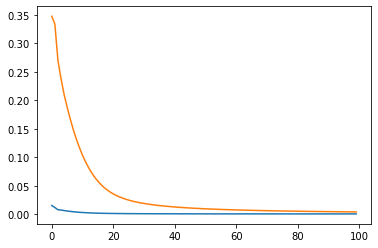

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

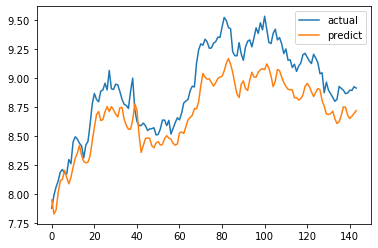

In [41]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(Y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.legend(["actual", "predict"])
plt.show()

In [42]:
model = Sequential()
model.add(LSTM(10, return_sequences=False, input_shape=(20, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test),shuffle=False)

Train on 575 samples, validate on 144 samples
Epoch 1/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0254 - val_loss: 0.2330
Epoch 2/100
575/575 [==============================] - 0s 351us/step - loss: 0.0051 - val_loss: 0.1253
Epoch 3/100
575/575 [==============================] - 0s 368us/step - loss: 0.0051 - val_loss: 0.1104
Epoch 4/100
575/575 [==============================] - 0s 341us/step - loss: 0.0045 - val_loss: 0.1100
Epoch 5/100
575/575 [==============================] - 0s 332us/step - loss: 0.0038 - val_loss: 0.0968
Epoch 6/100
575/575 [==============================] - 0s 345us/step - loss: 0.0034 - val_loss: 0.0829
Epoch 7/100
575/575 [==============================] - 0s 317us/step - loss: 0.0030 - val_loss: 0.0718
Epoch 8/100
575/575 [==============================] - 0s 306us/step - loss: 0.0026 - val_loss: 0.0611
Epoch 9/100
575/575 [==============================] - 0s 314us/step - loss: 0.0023 - val_loss: 0.0510
Epoch 10/100
575/575 [=======

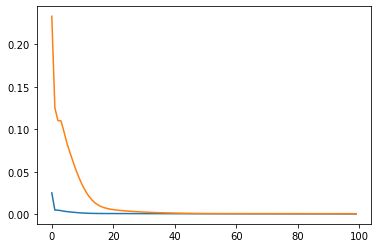

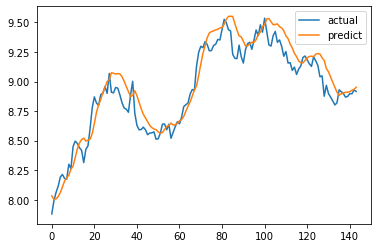

In [43]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(Y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.legend(["actual", "predict"])
plt.show()

In [44]:
model = Sequential()
model.add(GRU(10, return_sequences=False, input_shape=(20, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test),shuffle=False)

Train on 575 samples, validate on 144 samples
Epoch 1/100
575/575 [==============================] - 2s 3ms/step - loss: 0.1080 - val_loss: 0.7785
Epoch 2/100
575/575 [==============================] - 0s 294us/step - loss: 0.0409 - val_loss: 0.4600
Epoch 3/100
575/575 [==============================] - 0s 248us/step - loss: 0.0142 - val_loss: 0.2836
Epoch 4/100
575/575 [==============================] - 0s 257us/step - loss: 0.0092 - val_loss: 0.2111
Epoch 5/100
575/575 [==============================] - 0s 229us/step - loss: 0.0093 - val_loss: 0.1910
Epoch 6/100
575/575 [==============================] - 0s 229us/step - loss: 0.0089 - val_loss: 0.1834
Epoch 7/100
575/575 [==============================] - 0s 262us/step - loss: 0.0082 - val_loss: 0.1728
Epoch 8/100
575/575 [==============================] - 0s 223us/step - loss: 0.0075 - val_loss: 0.1592
Epoch 9/100
575/575 [==============================] - 0s 234us/step - loss: 0.0069 - val_loss: 0.1454
Epoch 10/100
575/575 [=======

575/575 [==============================] - 0s 425us/step - loss: 5.3448e-04 - val_loss: 5.6816e-04
Epoch 78/100
575/575 [==============================] - 0s 439us/step - loss: 5.3115e-04 - val_loss: 5.4984e-04
Epoch 79/100
575/575 [==============================] - 0s 330us/step - loss: 5.2785e-04 - val_loss: 5.3378e-04
Epoch 80/100
575/575 [==============================] - 0s 321us/step - loss: 5.2459e-04 - val_loss: 5.1992e-04
Epoch 81/100
575/575 [==============================] - 0s 447us/step - loss: 5.2137e-04 - val_loss: 5.0708e-04
Epoch 82/100
575/575 [==============================] - 0s 325us/step - loss: 5.1818e-04 - val_loss: 4.9570e-04
Epoch 83/100
575/575 [==============================] - 0s 326us/step - loss: 5.1504e-04 - val_loss: 4.8666e-04
Epoch 84/100
575/575 [==============================] - 0s 386us/step - loss: 5.1193e-04 - val_loss: 4.7894e-04
Epoch 85/100
575/575 [==============================] - 0s 310us/step - loss: 5.0887e-04 - val_loss: 4.7250e-04
Epoch

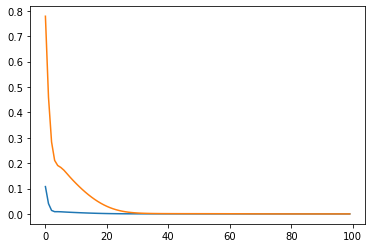

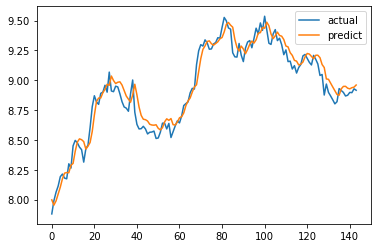

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(Y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.legend(["actual", "predict"])
plt.show()

SimpleRNN tiene el peor desempeño, dejando hacia el final una importante distancia. LSTM y GRU se aproximan más. De ellos dos, GRU tiene el mejor desempeño.